In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("cleaned.csv")
data.head()

,Unnamed: 0,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,0,Admit,California,3.90,6.7,962.0,100,Male,0
1,1,Admit,Florida,3.80,1.4,969.0,97,Male,4
2,3,Admit,Colorado,3.60,0.9,969.0,97,Female,2
3,6,Admit,California,3.88,1.5,967.0,95,Male,5
4,7,Admit,California,3.70,1.2,969.0,94,Male,2


## Performance metrics
### School Performance 

### Extracurricular performance 

In [7]:
sns.set_style("whitegrid")

In [8]:
metrics1 = ["GPA", "TestScore", "WritingScore"]
metrics2 = ["WorkExp", "VolunteerLevel"] 

/var/folders/7n/bg0mh_ms7w1_b_mqxy8znrbw0000gn/T/ipykernel_32388/371276326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], data=data_agg, x="Decision", y=metric, palette="Blues")
/var/folders/7n/bg0mh_ms7w1_b_mqxy8znrbw0000gn/T/ipykernel_32388/371276326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], data=data_agg, x="Decision", y=metric, palette="Blues")
/var/folders/7n/bg0mh_ms7w1_b_mqxy8znrbw0000gn/T/ipykernel_32388/371276326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], data=data_agg, x="

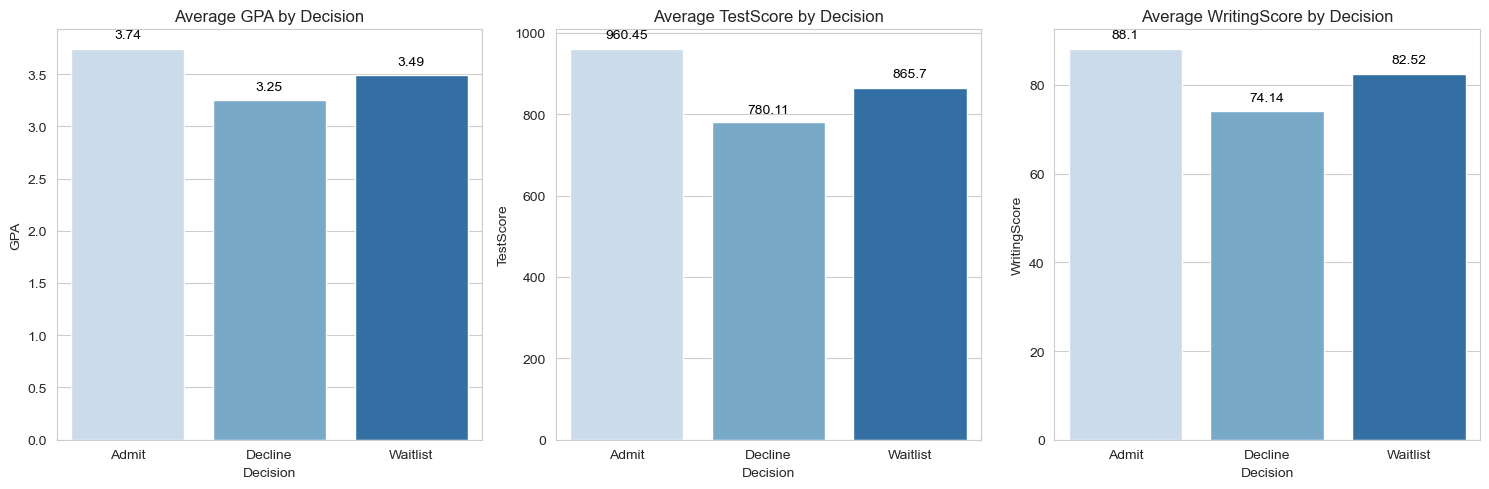

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, metric in enumerate(metrics1):
    data_agg = data.groupby("Decision")[metric].mean().reset_index()
    sns.barplot(ax=axes[i], data=data_agg, x="Decision", y=metric, palette="Blues")

    for idx, row in data_agg.iterrows():
        axes[i].text(x=idx, y=row[metric] + 0.02 * row[metric], 
                     s=round(row[metric], 2), ha="center", va="bottom", color="black")

    axes[i].set_title(f"Average {metric} by Decision", fontsize=12)
    axes[i].set_ylim(bottom=0)

plt.tight_layout()
plt.savefig("./graph/performance1.png")
plt.show()

/var/folders/7n/bg0mh_ms7w1_b_mqxy8znrbw0000gn/T/ipykernel_32388/2880434954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], data=data_agg, x="Decision", y=metric, palette="Oranges")
/var/folders/7n/bg0mh_ms7w1_b_mqxy8znrbw0000gn/T/ipykernel_32388/2880434954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], data=data_agg, x="Decision", y=metric, palette="Oranges")


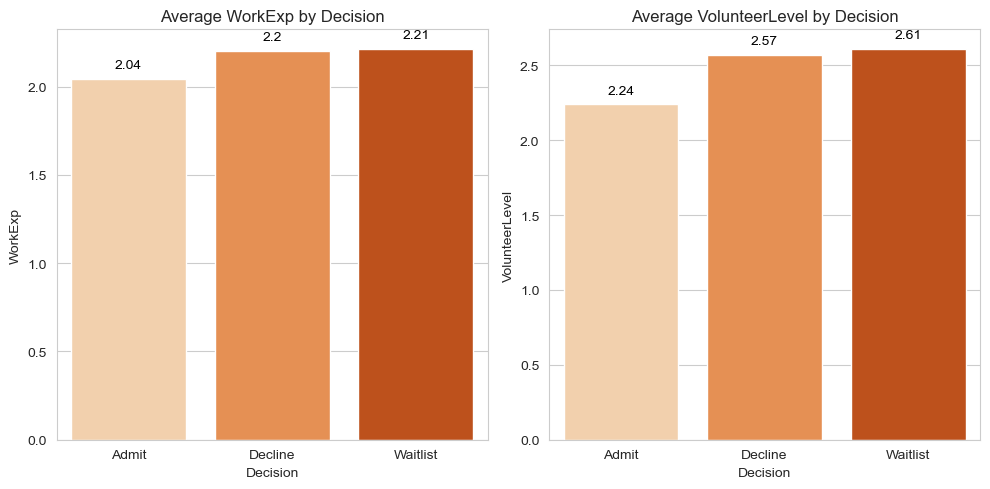

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for i, metric in enumerate(metrics2):
    data_agg = data.groupby("Decision")[metric].mean().reset_index()
    sns.barplot(ax=axes[i], data=data_agg, x="Decision", y=metric, palette="Oranges")

    for idx, row in data_agg.iterrows():
        axes[i].text(x=idx, y=row[metric] + 0.02 * row[metric], 
                     s=round(row[metric], 2), ha="center", va="bottom", color="black")

    axes[i].set_title(f"Average {metric} by Decision", fontsize=12)
    axes[i].set_ylim(bottom=0)

plt.tight_layout()
plt.savefig("./graph/performance2.png")
plt.show()

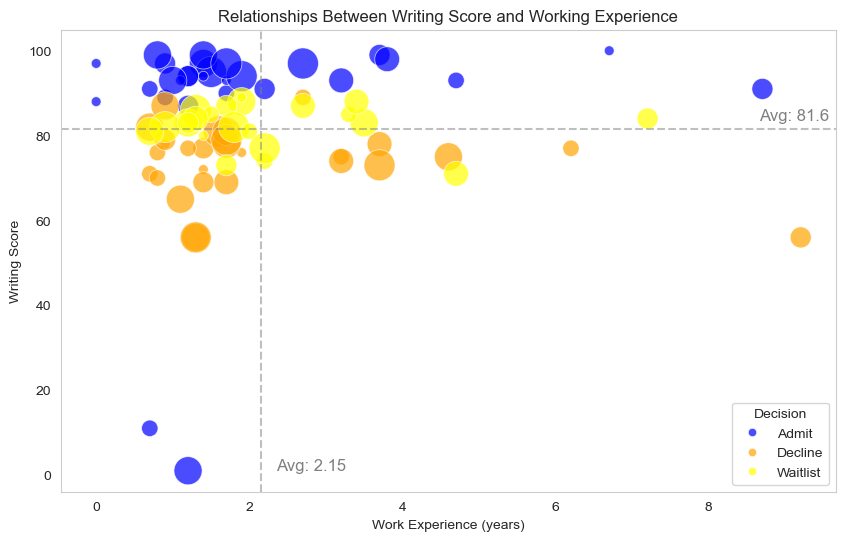

In [33]:
decision_colors = {"Admit": "blue", "Waitlist": "yellow", "Decline": "orange"}

plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=data, 
    x="WorkExp", 
    y="WritingScore", 
    size="VolunteerLevel", 
    hue="Decision", 
    palette=decision_colors, 
    alpha=0.7, 
    sizes=(50, 500)  # 控制气泡大小范围
)
plt.grid(False)

plt.title("Relationships Between Writing Score and Working Experience")
plt.xlabel("Work Experience (years)")
plt.ylabel("Writing Score")

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles[1:4], labels[1:4], title="Decision", loc="lower right")

mean_workexp = data["WorkExp"].mean()
mean_writingscore = data["WritingScore"].mean()
plt.axvline(mean_workexp, linestyle="dashed", color="gray", alpha=0.5)
plt.axhline(mean_writingscore, linestyle="dashed", color="gray", alpha=0.5)
plt.text(mean_workexp + 0.2, plt.ylim()[0] + 5, f"Avg: {mean_workexp:.2f}", color="gray", fontsize=12)
plt.text(plt.xlim()[1] - 1,  mean_writingscore + 2, f"Avg: {mean_writingscore:.1f}", color="gray", fontsize=12)



# 显示图表
plt.savefig("graph/writing_working.png")
plt.show()